# Detección de fraude en reclamaciones de seguro de automoviles
**Proyecto BEDU - Procesamiento de datos con Python**

## Equipo 11:

  * Gabriel Sainz Vázquez

  * Edgar Arellano Ruelas

  * Iván Delgado de la paz

#Identificación del problema


El fraude en la industria de los seguros ha mantenido su ritmo de crecimiento en los últimos años y a pesar de todas las tecnologías existentes no se ha podido disminuir el crecimiento y se hace cada vez más difícil su detección, pues los esquemas utilizados por los defraudadores siguen evolucionando. 

Hoy en día, el fraude sigue siendo un gran problema para las aseguradoras. Tan solo en el 2019 en México se tuvo una pérdida de **430 millones** de pesos en los seguros de automóviles ligados al fraude. Por lo cual, es necesario empezar a controlar estos reclamos. 
Esto se puede lograr a través de auditorías, sin embargo, debido a su costo, no es posible auditar todas las reclamaciones. 

Por ello, una de las soluciones es hacer uso de **modelos de aprendizaje máquina**.
El **objetivo** de este proyecto es investigar, analizar y evaluar el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, así como analizar posteriormente diferentes modelos de aprendizaje máquina para poder **predecir fraudes en automóviles **para poder así **prevenirlos** y lograr una reducción en los costos de operación de las aseguradoras, misma que debería de reflejarse en una reducción de las primas, beneficiando así a los asegurados. 

Los fraudes más comunes que se llevan a cabo son: 
- Robo simulado de vehículos y objetos.
- Agravación de un reclamo para obtener una pérdida total o una compensación por datos anteriores. 
- Responsabilidad de contratación por reclamaciones de terceros. 
- Solicitud de un recibo facturado en exceso o por duplicado para obtener el reembolso de los montos totales.
- Presupuesto sobrevalorado en talleres para beneficio propio.
- Connivencia por parte del corredor para simular un reclamo. 
- Connivencia por parte del inspector preliminar por no reportar los daños en el vehículo. 



# Listado de Preguntas

* ¿Con qué modelo de carro se comenten más fraudes?
* ¿En qué estado se cometen más fraudes?
* ¿En qué rango de edad la gente es más propensa a cometer fraudes?
* ¿En los casos de fraude en promedio de cuanto es la cantidad reclamada?
* ¿Entre qué horas se comete el mayor número de fraudes?
* ¿Quiénes son más propensos a cometer fraude hombres o mujeres?
* ¿Cuantos meses como cliente en promedio tiene la gente que comete fraude?
* ¿Cual es el Nivel educativo de las personas que cometen fraude?
* ¿Cual es la ocupación más común de las personas que cometen fraude?
* ¿En los casos de fraude cuál fue la gravedad del accidente?
* ¿En los casos de fraude hubo testigos?

Pero la pregunta principal: 

 #### **¿Cual de los factores mencionados anteriormente tiene más impacto?**

Con base en las preguntas anteriores, se podría determinar como **ASEGURADORA** si las reclamaciones que se realizan día con día son fraude o no y así, verificar y prestar más atención a las variables antes mencionadas. 

De acuerdo con los puntos anteriores y el impacto que tienen los fraudes en los seguros de automóviles en la sociedad, con este proyecto se busca analizar e investigar diferentes modelos de aprendizaje máquina para predecir fraudes en las reclamaciones de los seguros de automóviles, para poder así prevenirlos y lograr una reducción en los costos de operación de las aseguradoras, mismas que deberían reflejarse en una reducción en las primas, beneficiando así a los asegurados.

# Lectura de los Datos 

In [75]:
import pandas as pd
import numpy as np
import seaborn as sn
sn.set_theme(style="darkgrid")

In [76]:
!wget -O insurance_claims.csv https://raw.githubusercontent.com/edx04/Bedu-deteccion-de-fraude/main/insurance_claims.csv

--2021-03-15 04:52:57--  https://raw.githubusercontent.com/edx04/Bedu-deteccion-de-fraude/main/insurance_claims.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 266964 (261K) [text/plain]
Saving to: ‘insurance_claims.csv’

insurance_claims.cs 100%[===================>] 260.71K  --.-KB/s    in 0.02s   

2021-03-15 04:52:58 (11.0 MB/s) - ‘insurance_claims.csv’ saved [266964/266964]



In [77]:
df = pd.read_csv("insurance_claims.csv")

#Analisis Exploracion de datos

Primero revisamoslos primeros y ultimos datos del dataset, para analizar las columnas y los valores. 

In [78]:
df.head(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN


In [79]:
df.tail(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


Las preguntas que se tratarán de resolver son las siguientes: 

- ¿El conjunto de datos que tengo realmente me sirve para responder algunas de las preguntas que me planteé?

- ¿Qué tamaño tiene mi conjunto de datos? 

In [80]:
df.shape

(1000, 40)

Podemos notar que el conjunto de datos tiene 1000 filas y 40 columnas, lo cual, tiene un buen tamaño para ser procesado por medio de técnicas de clasificación.

- ¿Qué columnas tengo y qué información tengo en cada una de esas columnas?

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Antes de realizar una limpieza de datos, se realizará brevemente un análisis descriptivo para conocer mejor las variables y si existen anomalías en ellas: 

Se comienza describiendo la información del conjunto de Datos. 
Se muestra el número de datos, la media, desviación estandar, minimo, 25, 50, 75 percentil y el máximo de las variables numéricas. 

In [82]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


De igual manera, es importante conocer si existe una correlación alta entre las variables

In [83]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


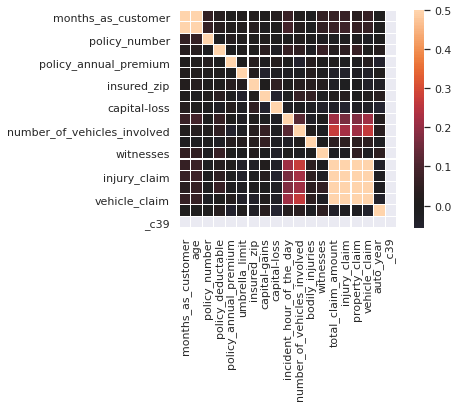

In [84]:
sn.heatmap(df.corr(), vmax=.5, center=0, annot=False, square=True, linewidths=.1)

In [85]:
df.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464,NaN
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430,NaN
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733,NaN
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088,NaN
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760,NaN
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734,NaN
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708,NaN
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376,NaN
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821,NaN
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562,NaN


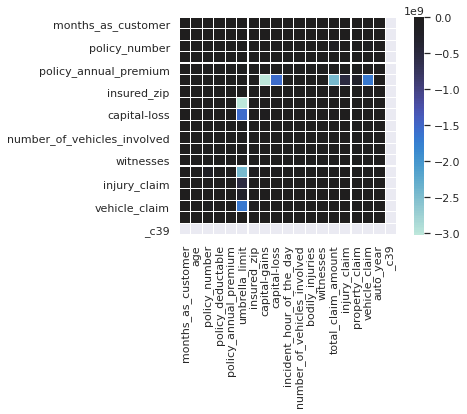

In [86]:
sn.heatmap(df.cov(), vmax=.5, center=0, annot=False, square=True, linewidths=.1)

Vamos a revisar cuantas variables únicas tiene cada una de las columnas de tipo object

In [87]:
#funcion auxiliar para crear la tabla con el numero de valores unicos
def unique_values(x):
  temp_dict = {}
  for i in x:
    num_uniques = df[i].nunique()
    temp_dict[i] = num_uniques
  return pd.DataFrame.from_dict(temp_dict,orient='index',columns=['valores_unicos'])

In [88]:
#obtenemos las variables tipo object
df_object=df.loc[:, df.dtypes == object]
object_columns = df_object.columns
print(object_columns)

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


In [89]:
unique_values(object_columns)

,valores_unicos
policy_bind_date,951
policy_state,3
policy_csl,3
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6
incident_date,60
incident_type,4


# Procesamiento de Datos
En esta sección, se transformarán, analizarán y realizar una limpieza de todas las variables que contiene nuestro conjunto de datos y de tal manera, tener una perspectiva general de nuestros datos para posteriormente aplicar una eficiente visualización por medio de gráficas y finalmente aplicar técnicas de Machine Learning, Clustering y herramientas de clasificación que nos ayuden a resolver de manera eficiente el problema presentado anteriormente.


## Limpieza de Datos

De acuerdo con la información anterior, podemos notar diferentes anomalías: 
- Existe una variable que tiene en toda la columna valores **NaN**: `_c39`
- Algunas variables no tienen el tipo de dato "correcto"
- Existen variables con '?' en el conjunto de datos, lo cual, se tienen que cambiar a valores **NaN**.

Se explorará de manera más general estas variables y en caso de ser necesario, se eliminarán filas y cambiará el tipo de dato.

In [90]:
df = df.dropna(axis=1, how = "all")
df = df.replace('?',np.NaN)

df.isna().sum(axis=0)

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [91]:
proporcion_nan_collision_type = df.isna().sum(axis=0)['collision_type']/len(df)*100
proporcion_nan_property_damage = df.isna().sum(axis=0)['property_damage']/len(df)*100
proporcion_nan_police_report_available = df.isna().sum(axis=0)['police_report_available']/len(df)*100
print(f'- Los NaN de la variable "collision_type" representan un {proporcion_nan_collision_type.round(2)}% de los datos')
print(f'- Los NaN de la variable "property_damage" representan un {proporcion_nan_property_damage.round(2)}% de los datos')
print(f'- Los NaN de la variable "police_report_available" representan un {proporcion_nan_police_report_available.round(2)}% de los datos')


- Los NaN de la variable "collision_type" representan un 17.8% de los datos
- Los NaN de la variable "property_damage" representan un 36.0% de los datos
- Los NaN de la variable "police_report_available" representan un 34.3% de los datos


Las **Nan** de las variables `collision_type`, `property_damage`, `police_report_available` tienen una gran participación participación en los datos, por lo que se reemplazará el '?' a diferentes valores:




In [92]:

# reemplazaremos '?' por el tipo más común de colisión, ya que, desconocemos el tipo
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# Puede darse el caso de que no haya respuestas por daños a la propiedad, entonces podríamos considerarlo como Sin daños a la propiedad.
df['property_damage'].fillna('NO', inplace = True)

# nuevamente, si no hay respuestas del informe policial del fpr disponible, entonces podríamos considerarlo como No hay informe disponible
df['police_report_available'].fillna('NO', inplace = True)

df.isnull().any().any()

False

## Transformación de Datos

Generalmente, la mayoría de los sitemas de detección de fraudes necesitan datos que estén normalizados, por lo que, procederemos a realizar ajustes en las variables categóricas, es decir, convertir a numéricas las variables categóricas.

De igual manera, ciertas variables tienen el tipo de dato "incorrecto", por lo que se hará un ajuste en la variable: 


In [93]:
# Se extraen los días, mes y año de la fecha de vinculación de la póliza y se transforman a datetime

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [94]:
# Para la variable respuesta (fraudes reportados) se cambian a variables numéricas

df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(1,0))

df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

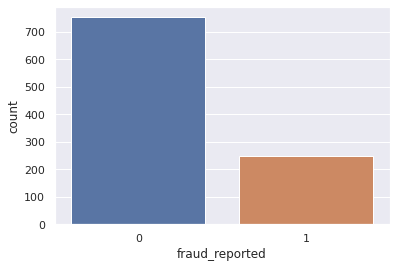

In [95]:
sn.countplot(x='fraud_reported',data=df)

Podemos notar que nos encontramos con 247 Fraudes y 753 no fraude.


### Rango de edades


- Creamos una nueva columna para clasificar las edades en rangos de 10 años, para mas adelante poder contestar a la pregunta de en que rango de edad se cometen mas fraudes

In [96]:
df['age_range'] = df['age'].apply(lambda x: f'{str(x)[0]}0 - {str(x)[0]}9') #crear una nueva colunma con los rangos de edad

In [97]:
df['age_range'].value_counts()

30 - 39    400
40 - 49    318
20 - 29    154
50 - 59    100
60 - 69     27
10 - 19      1
Name: age_range, dtype: int64

###Rango de hora

- De igual manera se obtienen los rangos para la hora del dia que succedio el accidente

In [98]:
def rangeHour(x):
  if 1  <= x and x <= 6:  return  '1 - 6'   
  if 7  <= x and x <= 12: return  '7 - 12' 
  if 13 <= x and x <= 18: return '13 - 18' 
  if 19 <= x and x <= 23: return '19 - 23' 

In [99]:
df['incident_hour_range'] = df['incident_hour_of_the_day'].apply(rangeHour)

### Transformacion columna incident_location

In [100]:
df['incident_location']

0           9935 4th Drive
1             6608 MLK Hwy
2        7121 Francis Lane
3         6956 Maple Drive
4             3041 3rd Ave
              ...         
995     6045 Andromedia St
996       3092 Texas Drive
997            7629 5th St
998          6128 Elm Lane
999    1416 Cherokee Ridge
Name: incident_location, Length: 1000, dtype: object

La columna incident_location nos indica el lugar donde sucedio el accidente como por ejemplo:


*   9935 4th Drive
*   6045 Andromedia St
*  6608 MLK Hwy
* 1416 Cherokee Ridge

Lo que podemos notar es que la ultima parte de la direccion es el tipo de via donde sucedio el accidente, por lo que puede ser util etraer esta información



In [101]:
df['type_road'] = df['incident_location'].apply(lambda x : x.split(" ")[-1])

In [102]:
df['type_road'].value_counts()

Drive    173
Lane     171
St       171
Ridge    171
Ave      161
Hwy      153
Name: type_road, dtype: int64

Como podemos observar todas las direcciones estan conformadas por 6 tipos de vias



## Respondiendo preguntas clave
En esta sección se tratará de responder las preguntas planteadas anteriormente. 

Se realizó la siguiente función para determinar la proporción de fraude por cada categoría de determinada variable selecta


In [103]:
# funccion auxiliar para calcular la proporción
def proporcion_fraudes(x):
  proporcion_df = df[[x,'fraud_reported']].groupby([x]).mean().sort_values(by = 'fraud_reported', ascending = False).round(3).multiply(100)
  proporcion_df.reset_index(inplace=True)
  return proporcion_df

In [104]:
def porciento_de_fraude(column):
  grouped = df[[column,'fraud_reported']].groupby(column)
  grouped_proportion = grouped.sum().divide(df['fraud_reported'].sum())
  grouped_percent = grouped_proportion.round(3).multiply(100)
  reindex_percent = grouped_percent.sort_values(by = 'fraud_reported', ascending = False)
  reindex_percent.reset_index(inplace=True)
  return reindex_percent

In [105]:
def bplot(data, y,  x="fraud_reported", title=None, xlabel=None, ylabel=None):
  """Crea graficas de barra a partir de un DF"""
  plot = sn.barplot(data=data, y=y, x=x, palette="Blues_r_d")
  plot.set(xlabel=xlabel) if xlabel else plot.set(xlabel=x)
  plot.set(ylabel=ylabel) if ylabel else plot.set(ylabel=y)
  plot.set(title=title)
  return plot

* ¿Con qué marca de carro se comenten más fraudes?

In [106]:
# Auto_make
porciento_de_fraude('auto_make')

,auto_make,fraud_reported
0,Ford,8.9
1,Mercedes,8.9
2,Audi,8.5
3,Chevrolet,8.5
4,BMW,8.1
5,Dodge,8.1
6,Suburu,7.7
7,Volkswagen,7.7
8,Saab,7.3
9,Honda,5.7


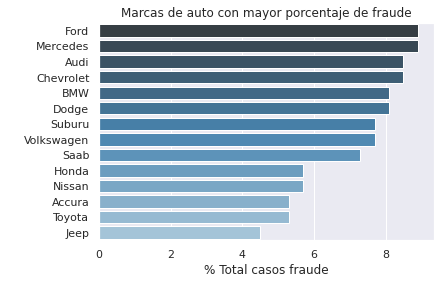

In [107]:
bplot(porciento_de_fraude('auto_make'), y='auto_make', title="Marcas de auto con mayor porcentaje de fraude", xlabel="% Total casos fraude", ylabel=" ")

In [108]:
proporcion_fraudes('auto_make')

,auto_make,fraud_reported
0,Mercedes,33.8
1,Ford,30.6
2,Audi,30.4
3,Volkswagen,27.9
4,BMW,27.8
5,Chevrolet,27.6
6,Honda,25.5
7,Dodge,25.0
8,Suburu,23.8
9,Saab,22.5


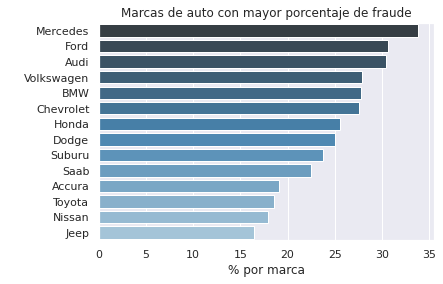

In [109]:
bplot(proporcion_fraudes('auto_make'), y='auto_make', title="Marcas de auto con mayor porcentaje de fraude", xlabel="% por marca", ylabel=" ")

Es interesante notar que la mayor proporción de fraudes que se obtuvo por marca de autos fue Mercedes, seguido de Ford y posteriormente Audi.

* ¿En qué rango de edad cometen más fraudes?

In [110]:
#porciento_de_fraude('auto_model')
porciento_de_fraude('age_range')

,age_range,fraud_reported
0,30 - 39,38.9
1,40 - 49,29.6
2,20 - 29,15.8
3,50 - 59,11.7
4,60 - 69,3.6
5,10 - 19,0.4


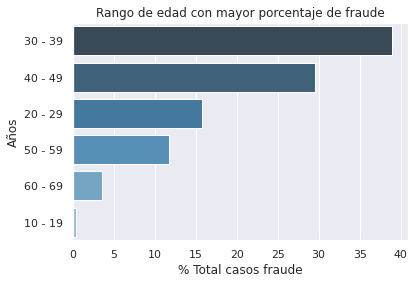

In [111]:
bplot(porciento_de_fraude('age_range'), y='age_range', title="Rango de edad con mayor porcentaje de fraude", xlabel="% Total casos fraude", ylabel="Años")

- ¿En qué estado se cometen más fraudes?

In [112]:
porciento_de_fraude('incident_state')

,incident_state,fraud_reported
0,SC,29.6
1,NY,23.5
2,WV,15.8
3,NC,13.8
4,VA,10.1
5,OH,4.0
6,PA,3.2


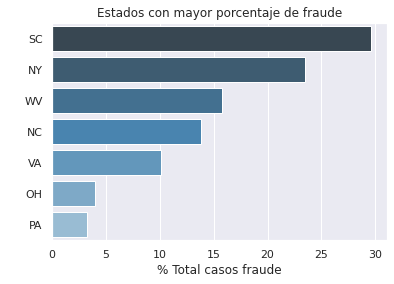

In [113]:
bplot(porciento_de_fraude('incident_state'), y='incident_state', title="Estados con mayor porcentaje de fraude", xlabel="% Total casos fraude", ylabel=" ")

- ¿Cual es la cantidad promedio de suma reclamada?

In [114]:
df['total_claim_amount'].mean()

52761.94

- ¿En qué hora se comete el mayor número de fraude?

In [115]:
porciento_de_fraude('incident_hour_range')

,incident_hour_range,fraud_reported
0,13 - 18,30.0
1,1 - 6,24.7
2,7 - 12,21.5
3,19 - 23,19.0


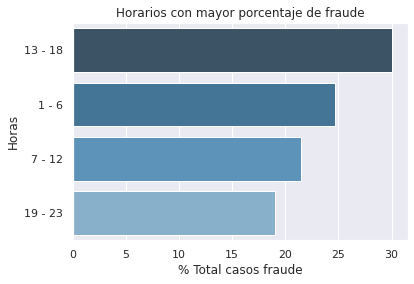

In [116]:
bplot(porciento_de_fraude('incident_hour_range'), y='incident_hour_range', title="Horarios con mayor porcentaje de fraude", xlabel="% Total casos fraude", ylabel="Horas")

- ¿Quienes son más propensos a cometer fraude?

In [117]:
# insured_sex
proporcion_fraudes('insured_sex')

,insured_sex,fraud_reported
0,MALE,26.1
1,FEMALE,23.5


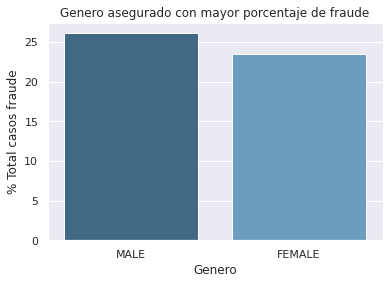

In [118]:
bplot(proporcion_fraudes('insured_sex'), x='insured_sex', y='fraud_reported', 
      title="Genero asegurado con mayor porcentaje de fraude", 
      ylabel="% Total casos fraude", xlabel="Genero")

In [119]:
porciento_de_fraude('insured_sex')

,insured_sex,fraud_reported
0,FEMALE,51.0
1,MALE,49.0


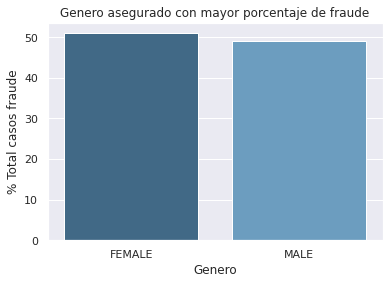

In [120]:
bplot(porciento_de_fraude('insured_sex'), x='insured_sex', y='fraud_reported', 
      title="Genero asegurado con mayor porcentaje de fraude", 
      ylabel="% Total casos fraude", xlabel="Genero")

- ¿Cuanto es el promedio de meses por cliente que se comete fraude?

In [121]:
df[df['fraud_reported']==1]['months_as_customer'].describe()

count    247.000000
mean     208.080972
std      119.824064
min        3.000000
25%      116.000000
50%      199.000000
75%      279.000000
max      478.000000
Name: months_as_customer, dtype: float64

- ¿Cual es el nivel educativo de las personas que cometen fraude?

In [122]:
porciento_de_fraude("insured_education_level")

,insured_education_level,fraud_reported
0,JD,17.0
1,MD,15.4
2,High School,14.6
3,Associate,13.8
4,PhD,13.4
5,College,13.0
6,Masters,13.0


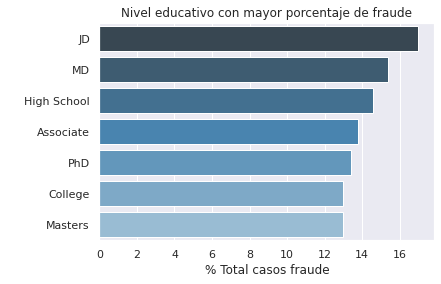

In [123]:
bplot(porciento_de_fraude('insured_education_level'), y='insured_education_level', 
      title="Nivel educativo con mayor porcentaje de fraude", 
      xlabel="% Total casos fraude", ylabel=" ")

- ¿Cual es la ocupación más común de las personas que cometen fraude?

In [124]:
porciento_de_fraude("insured_occupation")

,insured_occupation,fraud_reported
0,exec-managerial,11.3
1,craft-repair,8.9
2,machine-op-inspct,8.9
3,tech-support,8.9
4,sales,8.5
5,transport-moving,8.5
6,prof-specialty,7.3
7,armed-forces,6.9
8,farming-fishing,6.5
9,protective-serv,5.7


En este caso, es más probable que al haber un caso reportado a la policía, no sea fraude.

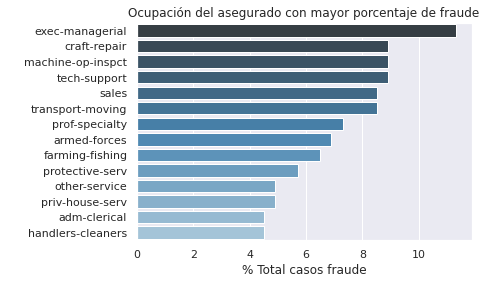

In [125]:
bplot(porciento_de_fraude("insured_occupation"), y='insured_occupation', 
      title="Ocupación del asegurado con mayor porcentaje de fraude", 
      xlabel="% Total casos fraude", ylabel=" ")

De igual manera, podemos ver que cuando existe algún daño a la propiedad, es más probable que sí haya fraude.

- ¿Qué tan severo es el incidente cuando hay fraude?

In [126]:
# incident_severity
proporcion_fraudes('incident_severity')

,incident_severity,fraud_reported
0,Major Damage,60.5
1,Total Loss,12.9
2,Minor Damage,10.7
3,Trivial Damage,6.7


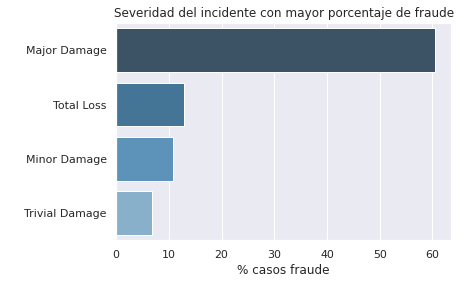

In [127]:
bplot(proporcion_fraudes('incident_severity'), y='incident_severity', 
      title="Severidad del incidente con mayor porcentaje de fraude", 
      xlabel="% casos fraude", ylabel=" ")

- ¿En los casos de fraude hubo testigos?

In [128]:
df[df['fraud_reported']==1]['witnesses'].mean()

1.582995951417004

En los casos de fraude en promedio hubo 1.6 testigos

In [129]:
# Transformando a fecha

df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')

df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

Con base en las preguntas anteriores, ya tenemos una perspectiva más amplia de nuestras variables y de cómo se comporta el fraude en los asegurados de la empresa. 

Sin embargo, es dificil determinar qué peso tienen estas variable, por lo tanto, los algoritmos de clasificación funcionan muy bien para predecir el fraude en este tipo de problemas, lo cual, en esta previa exploración de las variables no es posible determinar o predecir si un reclamo proviene o no de un fraude. 

En secciones posteriores se abordará más en ese aspecto.

## Transformación de Datos - Continuación

### Eliminando columnas innecesarias

Después de una valuación exhaustiva, consideramos que diferentes variables como `'policy_number','policy_bind_date', 'incident_date','incident_location','auto_model'` pueden ser excluidas, ya que, no tienen una relación con ser fraude o no.

In [130]:
df2 = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location','auto_model','insured_zip',
               'incident_hour_of_the_day','incident_month','incident_day'], axis = 1)

df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'age_range', 'incident_hour_range',
       'type_road'],
      dtype='object')

Por lo tanto, el núevo DataFrame que ya está listo para pasar por un proceso de Machine Learning y de Clasificación. 
Se muestra acontinuación: 

###Normalizando los datos numericos




El tener valores en distintos ordenes de magnitud es un problema para muchos modelos de machine learning por eso es útil normalizar los datos.


 $$x = \frac{x - X_{min}}{ X_{max} - X_{min}}$$

Función para normalizar los datos utilizando la formula anterior

In [131]:

def normalize(df,columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

Seleccionamos algunas de las columnas con variables numericas 

In [132]:

df_num=df2.loc[:, (df.dtypes == int) | (df.dtypes == float)]
df_num = df_num.drop(columns=['fraud_reported','age','number_of_vehicles_involved','bodily_injuries',	'witnesses'	])
columns = df_num.columns
print(columns)

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')


In [133]:
df3 = normalize(df2,columns)

Datos normalizados

In [134]:
df3.head(2)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,age_range,incident_hour_range,type_road
0,0.684760,48,OH,250/500,0.333333,0.603112,0.090909,MALE,MD,craft-repair,sleeping,husband,0.530348,1.0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,0.622801,0.303497,0.550063,0.654296,Saab,0.45,1,40 - 49,1 - 6,Drive
1,0.475992,42,IN,250/500,1.000000,0.473214,0.545455,MALE,MD,machine-op-inspct,reading,other-relative,0.000000,1.0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,1,NO,0,0,NO,0.043285,0.036364,0.032953,0.043276,Mercedes,0.60,1,40 - 49,7 - 12,Hwy


### One Hot Encoding
One Hot Encoding es un proceso mediante el cual las variables categóricas se convierten en una forma que podría proporcionarse a los algoritmos de Machine Learning para hacer un mejor trabajo en la predicción.

In [135]:
df3['property_damage'] = df3['property_damage'].map({'YES': 1, 'NO': 0})
df3['police_report_available'] = df3['police_report_available'].map({'YES': 1, 'NO': 0})
df4 = pd.get_dummies(df3)

# DataFrame listo para el proceso de Clasificación: 

In [136]:
df4.head(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,...,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,age_range_10 - 19,age_range_20 - 29,age_range_30 - 39,age_range_40 - 49,age_range_50 - 59,age_range_60 - 69,incident_hour_range_1 - 6,incident_hour_range_13 - 18,incident_hour_range_19 - 23,incident_hour_range_7 - 12,type_road_Ave,type_road_Drive,type_road_Hwy,type_road_Lane,type_road_Ridge,type_road_St
0,0.684760,48,0.333333,0.603112,0.090909,0.530348,1.0,1,1,1,2,1,0.622801,0.303497,0.550063,0.654296,0.45,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,0.475992,42,1.000000,0.473214,0.545455,0.000000,1.0,1,0,0,0,0,0.043285,0.036364,0.032953,0.043276,0.60,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [137]:
df4.shape

(1000, 133)

Por lo tanto, de acuerdo con la información, transformación y limpieza de datos, al ser un análisis de clasificación, consideramos que el conjunto de datos sí nos servirá para predecir la detección de fraude en esta rama.

# Modelando con conjunto de muestras

En esta sección, se busca aplicar diferentes modelos que utilicen Machine Learning, como: 
- Random Forest Classifier
- C5.0
- Support Vector Machine
- Regresión Logística
- Easy Ensemble Classifier
- Bagging Classifier
- Voting Classifier

Entre otros. 

Estamos muy entusiasmados por este proyecto, ya que, le hemos dedicado mucho tiempo, esfuerzo y consideramos que las herramientas vistas en clase han sido de total ayuda. 

